In [2]:
# --- Project Setup ---
from setup_notebook import setup_project_root
setup_project_root()

# --- Imports ---
from src.project_config import PROCESSED_DIR, PROTEIN_IDS_CSV, get_paths_protein, get_paths, COLORS_MODELS
from src.statistics.statistics_per_2D import compute_2D_statistics
import pandas as pd
from tqdm.notebook import tqdm
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401

In [3]:
topology = pd.read_csv("/Users/doma/Documents/Bachelor_Arbeit/Code/data/processed/6.4.Rankscore_per_structure/human_proteome_topology.csv")

In [3]:
topology.head()

,Structure,AM_mean,ESM_mean,count,percentage
0,Extracellular,0.481384,0.521662,951733,40.379170
1,Cytoplasmic,0.471058,0.486216,736815,31.260845
2,Transmembrane,0.598227,0.629036,448047,19.009287
3,Lumenal,0.524841,0.531847,179443,7.613227
4,Mitochondrial intermembrane,0.522512,0.546173,12857,0.545484


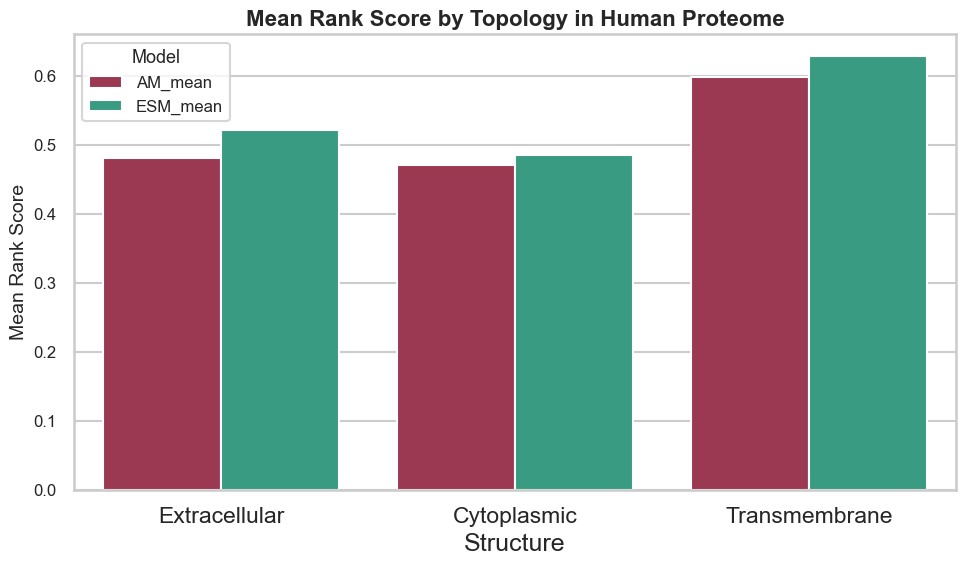

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker



# Example: Replace with actual path if needed
# topology = pd.read_csv("path_to_topology.csv")

# Simulated small version of the data (replace this with the actual DataFrame)
"""
topology = pd.DataFrame({
    'Structure': ['Extracellular', 'Cytoplasmic', 'Transmembrane'],
    'AM_mean': [0.481384, 0.471058, 0.598227],
    'ESM_mean': [0.521662, 0.486216, 0.629036],
    'count': [951733, 736815, 448047],
    'percentage': [40.379170, 31.260845, 19.009287]
})
"""

# Include only the first 5 rows
topology = topology[:3]

# Melt the DataFrame for plotting
long_df = topology.melt(
    id_vars='Structure',
    value_vars=['AM_mean', 'ESM_mean'],
    var_name='Model',
    value_name='Mean Rank Score'
)

# Set seaborn theme
sns.set_theme(style="whitegrid", context="talk")

# Custom color palette (replace COLORS_MODELS if defined elsewhere)
palette = {
    'AM_mean': COLORS_MODELS['AM'],  # Blue
    'ESM_mean': COLORS_MODELS['ESM']  # Orange
}


# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=long_df,
    x='Structure',
    y='Mean Rank Score',
    hue='Model',
    palette=palette
)

# Aesthetics
ax.set_title("Mean Rank Score by Topology in Human Proteome", fontsize=16, weight='bold')
ax.set_ylabel("Mean Rank Score", fontsize=14)
ax.set_xlabel("Structure", fontsize=18)
# Add this after creating the plot (`ax = sns.barplot(...)`)
ax.xaxis.set_minor_locator(ticker.MultipleLocator(10))
ax.tick_params(axis='x', which='minor', length=4, color='gray')

ax.tick_params(axis='y', labelsize=12)
plt.legend(title='Model', title_fontsize=13, fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()
